In [2]:
#Loading Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [5]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [6]:
df = pd.read_csv('amazon.csv')

# **Data Exploration (Ratings/Ratings Count)**

### **Univariate**

In [7]:
df.groupby(['product_id', 'rating']).size().reset_index(name='rating_count').sort_values(by='rating_count', ascending=False).head(20)


,product_id,rating,rating_count
261,B077Z65HSD,4.3,3
939,B09KLVMZ3B,4.1,3
848,B098NS6PVG,4,3
522,B083342NKJ,4.4,3
519,B082T6V3DT,4.3,3
771,B08Y1TFSP6,3.9,3
877,B09C6HXFC1,4.5,3
643,B08HDJ86NZ,4.2,3
881,B09CMP1SC8,4.1,3
555,B085DTN6R2,4.2,3


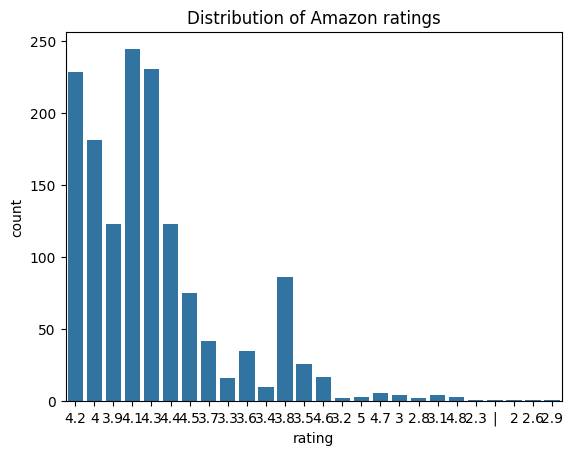

In [12]:
sns.countplot(x='rating', data=df)
plt.title('Distribution of Amazon ratings')
plt.show()

#

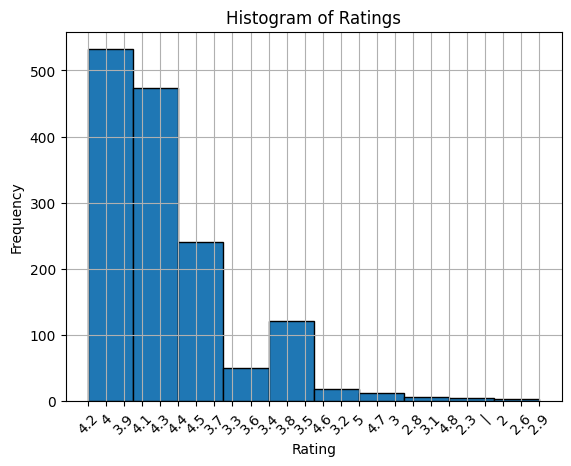

In [9]:
import matplotlib.pyplot as plt

# Plot histogram with rotated x-axis labels
df['rating'].hist(bins=10, edgecolor='black')
plt.title('Histogram of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# Rotate the x-axis labels
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees (or adjust as needed)
plt.show()


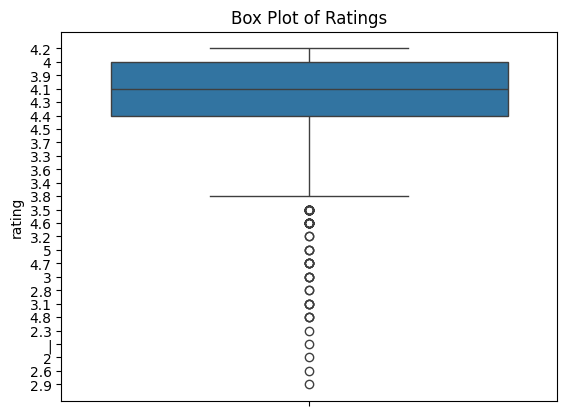

In [10]:
import seaborn as sns

# Plot a boxplot for the 'rating' column
sns.boxplot(df['rating'])
plt.title('Box Plot of Ratings')
plt.show()


In [14]:
# Convert the 'rating' and 'rating_count' columns to integers
df['rating'] = pd.to_numeric(df['rating'], errors='coerce').fillna(0).astype(int)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce').fillna(0).astype(int)

In [15]:
# Summary statistics for 'rating'
rating_mean = df['rating'].mean()
rating_median = df['rating'].median()
rating_mode = df['rating'].mode()[0]  # Mode returns a Series, so we take the first value

# Summary statistics for 'rating_count'
rating_count_mean = df['rating_count'].mean()
rating_count_median = df['rating_count'].median()
rating_count_mode = df['rating_count'].mode()[0]  # Mode returns a Series

# Print results
print(f"Rating - Mean: {rating_mean}, Median: {rating_median}, Mode: {rating_mode}")
print(f"Rating Count - Mean: {rating_count_mean}, Median: {rating_count_median}, Mode: {rating_count_mode}")


Rating - Mean: 3.75358361774744, Median: 4.0, Mode: 4
Rating Count - Mean: 77.48737201365188, Median: 0.0, Mode: 0


In [16]:
# Calculate range for 'rating' or 'rating_count'
rating_range = df['rating'].max() - df['rating'].min()
rating_count_range = df['rating_count'].max() - df['rating_count'].min()

print(f"Range for rating: {rating_range}")
print(f"Range for rating_count: {rating_count_range}")


Range for rating: 5
Range for rating_count: 992


In [17]:
# Calculate quantiles for 'rating'
quantiles_rating = df['rating'].quantile([0.25, 0.5, 0.75])

# Calculate quantiles for 'rating_count'
quantiles_rating_count = df['rating_count'].quantile([0.25, 0.5, 0.75])

print("Quantiles for rating:")
print(quantiles_rating)

print("Quantiles for rating_count:")
print(quantiles_rating_count)


Quantiles for rating:
0.25    4.0
0.50    4.0
0.75    4.0
Name: rating, dtype: float64
Quantiles for rating_count:
0.25    0.0
0.50    0.0
0.75    0.0
Name: rating_count, dtype: float64


In [18]:
# Calculate variance for 'rating'
rating_variance = df['rating'].var()

# Calculate variance for 'rating_count'
rating_count_variance = df['rating_count'].var()

print(f"Variance for rating: {rating_variance}")
print(f"Variance for rating_count: {rating_count_variance}")


Variance for rating: 0.2063139931740599
Variance for rating_count: 36942.00274343006


In [19]:
# Calculate standard deviation for 'rating'
rating_std = df['rating'].std()

# Calculate standard deviation for 'rating_count'
rating_count_std = df['rating_count'].std()

print(f"Standard Deviation for rating: {rating_std}")
print(f"Standard Deviation for rating_count: {rating_count_std}")


Standard Deviation for rating: 0.4542180018163744
Standard Deviation for rating_count: 192.2030248030193


In [20]:
# Calculate coefficient of variation for 'rating'
cv_rating = (rating_std / df['rating'].mean()) * 100

# Calculate coefficient of variation for 'rating_count'
cv_rating_count = (rating_count_std / df['rating_count'].mean()) * 100

print(f"Coefficient of Variation for rating: {cv_rating}%")
print(f"Coefficient of Variation for rating_count: {cv_rating_count}%")


Coefficient of Variation for rating: 12.100916033114903%
Coefficient of Variation for rating_count: 248.04431974948974%


### **Bivariate**

Correlation between rating and rating_count: -0.14092813882863575


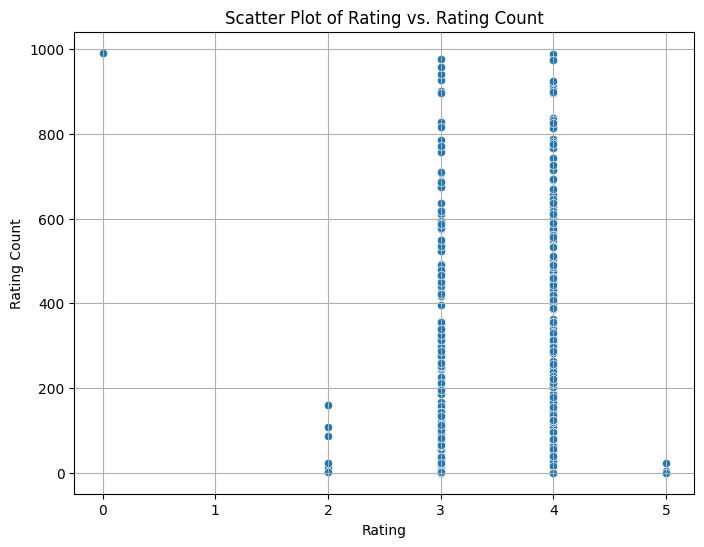

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is already loaded and 'rating' & 'rating_count' are numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# 1. Calculate Correlation
correlation = df['rating'].corr(df['rating_count'])
print(f"Correlation between rating and rating_count: {correlation}")

# 2. Scatter Plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='rating', y='rating_count', data=df)

plt.title('Scatter Plot of Rating vs. Rating Count')
plt.xlabel('Rating')
plt.ylabel('Rating Count')
plt.grid(True)
plt.show()